<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#EDA.-Исследовательский-анализ-данных" data-toc-modified-id="EDA.-Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Качество-данных" data-toc-modified-id="Качество-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Качество данных</a></span></li><li><span><a href="#Групповые-показатели" data-toc-modified-id="Групповые-показатели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Групповые показатели</a></span></li><li><span><a href="#Распределение-показателей" data-toc-modified-id="Распределение-показателей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Распределение показателей</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Матрица корреляций</a></span></li><li><span><a href="#EDA.-Выводы" data-toc-modified-id="EDA.-Выводы-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>EDA. Выводы</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Подготовка-и-проверка-моделей" data-toc-modified-id="Подготовка-и-проверка-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка и проверка моделей</a></span></li><li><span><a href="#Прогнозирование-оттока.-Выводы" data-toc-modified-id="Прогнозирование-оттока.-Выводы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Прогнозирование оттока. Выводы</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Выделение-кластеров" data-toc-modified-id="Выделение-кластеров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выделение кластеров</a></span></li><li><span><a href="#Описание-кластеров" data-toc-modified-id="Описание-кластеров-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Описание кластеров</a></span></li><li><span><a href="#Кластеризация.-Выводы" data-toc-modified-id="Кластеризация.-Выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Кластеризация. Выводы</a></span></li></ul></li><li><span><a href="#Вывод-исследования-и-базовые--рекомендации-по-работе-с-клиентами" data-toc-modified-id="Вывод-исследования-и-базовые--рекомендации-по-работе-с-клиентами-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод исследования и базовые  рекомендации по работе с клиентами</a></span></li></ul></div>

# Machine master

###### Контекст

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами. Заказчику важно получить типичные портреты клиентов, понять какие основные признаки наиболее сильно влияют на отток клиентов и получить модель способную спрогнозировать его.

###### Данные

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Данные содержат информацию о клиенте за предыдущий до проверки факта оттока месяц, информацию на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента.

###### Цели

- Построить модель прогнозирования оттока клиентов и определить наиболее весомые для оттока признаки;
- Выделить кластеры клиентов и определить их характеристики;
- Сформировать базовые рекомендации по работе с клиентами.

###### Библиотеки и настройки

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

# увеличим дефолтные настройки графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13, 6
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import  accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

## Знакомство с данными

In [2]:
try:
    df = pd.read_csv('datasets/gym_churn.csv')
except:
    df = pd.read_csv('/datasets/gym_churn.csv')

# упорядочиваю столбцы
df = df.reindex(columns=['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Age', 'Lifetime',
       'Contract_period', 'Month_to_end_contract', 'Group_visits', 
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total',
       'Churn'])
# привожу их названия к snake_case
df.columns = df.columns.str.lower()

df.head()

,gender,near_location,partner,promo_friends,phone,age,lifetime,contract_period,month_to_end_contract,group_visits,avg_class_frequency_total,avg_class_frequency_current_month,avg_additional_charges_total,churn
0,1,1,1,1,0,29,3,6,5.0,1,0.020398,0.000000,14.227470,0
1,0,1,0,0,1,31,7,12,12.0,1,1.922936,1.910244,113.202938,0
2,0,1,1,0,1,28,2,1,1.0,0,1.859098,1.736502,129.448479,0
3,0,1,1,1,1,33,2,12,12.0,1,3.205633,3.357215,62.669863,0
4,1,1,1,1,1,26,3,1,1.0,0,1.113884,1.120078,198.362265,0


###### Таблица `df`

Таблица содержит данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
- Данные клиента за предыдущий до проверки факта оттока месяц:
    - `gender` — пол;
    - `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
    - `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - `Phone` — наличие контактного телефона;
    - `Age` — возраст;
    - `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    - `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
    - `Group_visits` — факт посещения групповых занятий;
    - `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
    - `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
    - `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- `Churn` — факт оттока в текущем месяце.

## EDA. Исследовательский анализ данных

### Качество данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   age                                4000 non-null   int64  
 6   lifetime                           4000 non-null   int64  
 7   contract_period                    4000 non-null   int64  
 8   month_to_end_contract              4000 non-null   float64
 9   group_visits                       4000 non-null   int64  
 10  avg_class_frequency_total          4000 non-null   float64
 11  avg_class_frequency_current_month  4000 non-null   float

- В датасете 4000 наблюдений и 14 полей - 13 признаков и целевая переменная;
- В данных нет категориальных переменных нуждающихся в предобработке;
- Количественные данные представлены в адекватных типах, также не нуждаются в предобработке;
- Пропусков нет, данные полные.

In [4]:
df.describe()

,gender,near_location,partner,promo_friends,phone,age,lifetime,contract_period,month_to_end_contract,group_visits,avg_class_frequency_total,avg_class_frequency_current_month,avg_additional_charges_total,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,29.184250,3.724750,4.681250,4.322750,0.412250,1.879020,1.767052,146.943728,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,3.258367,3.749267,4.549706,4.191297,0.492301,0.972245,1.052906,96.355602,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.148205,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,27.000000,1.000000,1.000000,1.000000,0.000000,1.180875,0.963003,68.868830,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,29.000000,3.000000,1.000000,1.000000,0.000000,1.832768,1.719574,136.220159,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,5.000000,6.000000,6.000000,1.000000,2.536078,2.510336,210.949625,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,41.000000,31.000000,12.000000,12.000000,1.000000,6.023668,6.146783,552.590740,1.000000


- Практически все клиенты живут или работают недалеко от фитнес-центра;
- Половина приходит по партнерской программе, треть - по программе "приведи друга";
- Клиенты - это в равной степени и мужчины и женщины, средний возраст 29 лет;
- Среднее время жизненного цикла меньше, чем среднее время контракта, значит доля новых клиентов высока;
- Четверть клиентов попадает в отток.

### Групповые показатели

In [5]:
churn_gr = df.groupby('churn').mean()
churn_gr

,gender,near_location,partner,promo_friends,phone,age,lifetime,contract_period,month_to_end_contract,group_visits,avg_class_frequency_total,avg_class_frequency_current_month,avg_additional_charges_total
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,29.976523,4.711807,5.747193,5.283089,0.464103,2.024876,2.027882,158.445715
1,0.510839,0.768143,0.355325,0.183789,0.902922,26.989632,0.990575,1.728558,1.662582,0.268615,1.474995,1.044546,115.082899


Клиенты попавшие в отток:
- Реже работают/живут недалеко от фитнес-центра;
- Реже приходят по партнерской программе, либо по программе "приведи друга";
- Моложе;
- Оформляют контракты на менее длительные сроки;
- Уходят в первый месяц;
- Реже посещают тренировки и реже ходят на групповые занятия;

### Распределение показателей

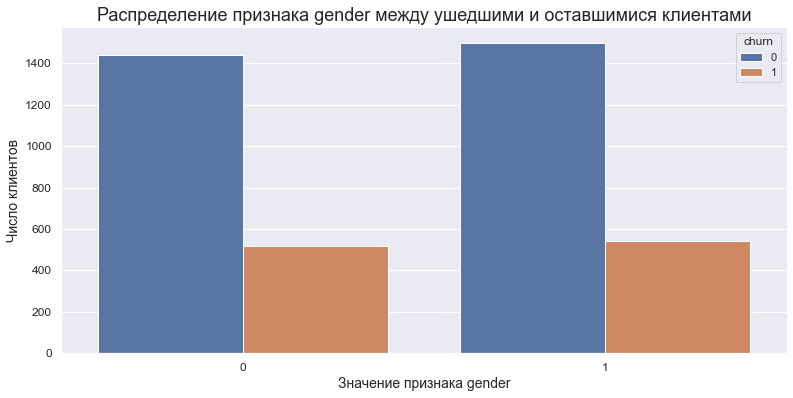

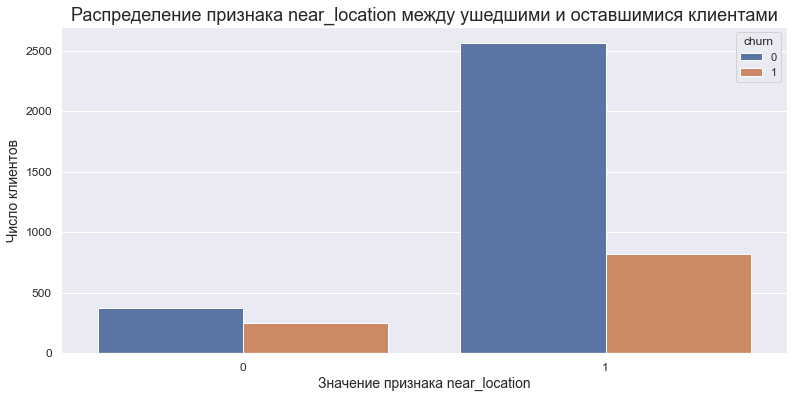

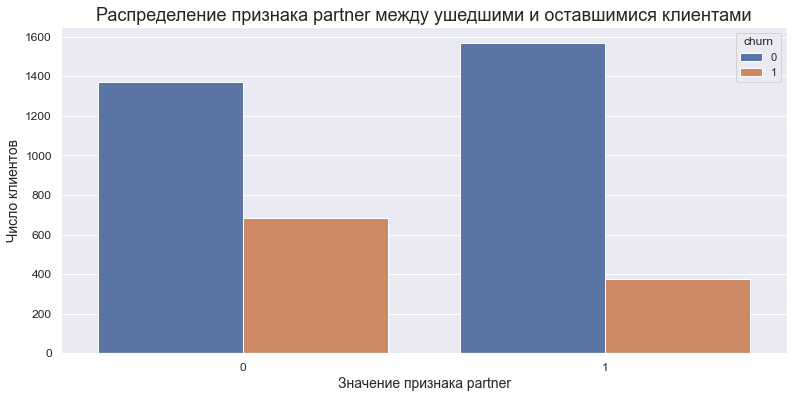

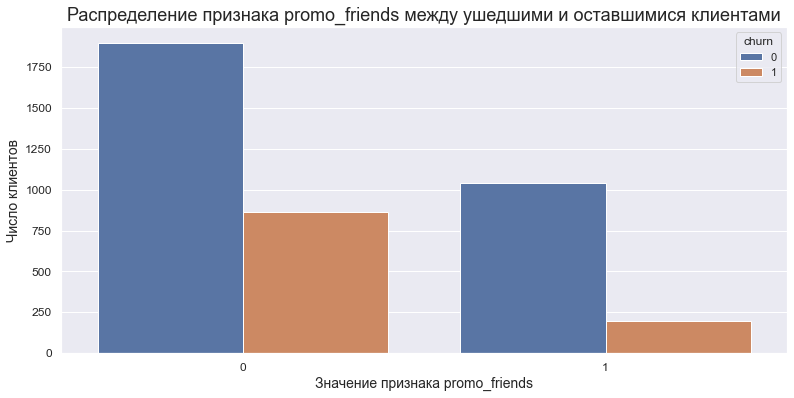

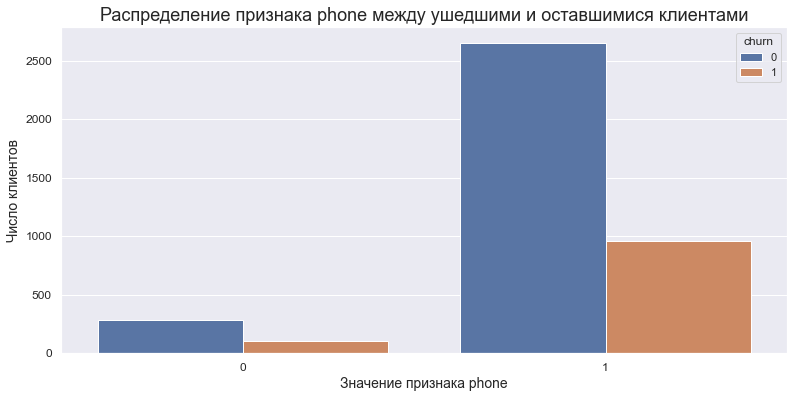

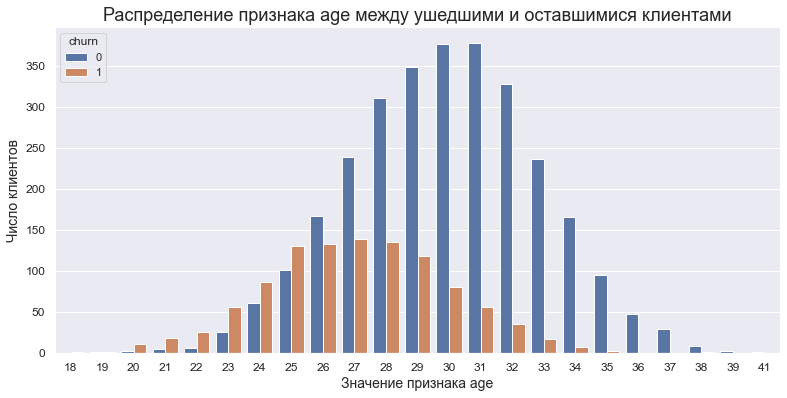

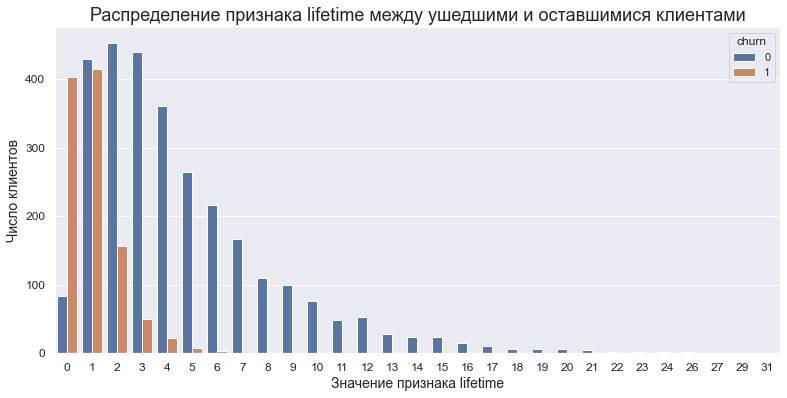

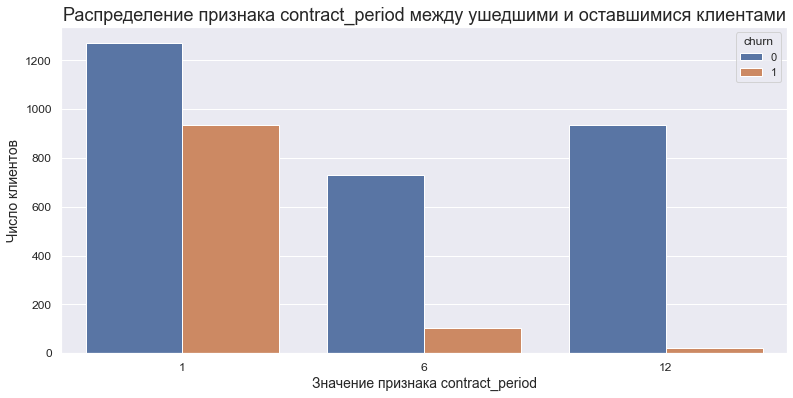

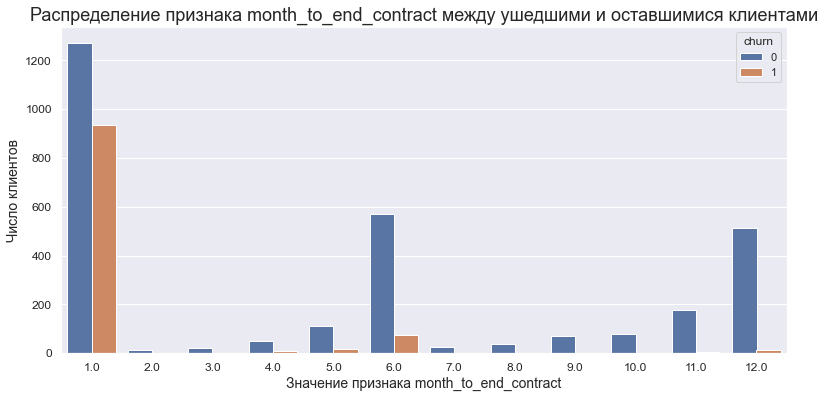

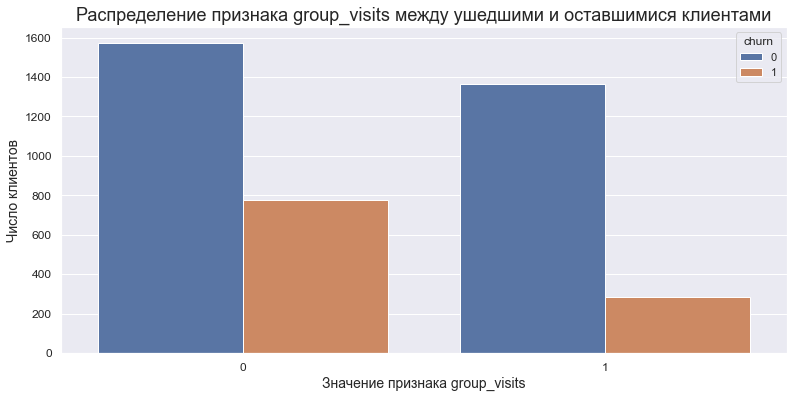

In [6]:
for column in df.columns[:-4]:
    plt.figure()
    sns.countplot(x=df[column], hue='churn', data=df)
    
    plt.title(f'Распределение признака {column} между ушедшими и оставшимися клиентами')
    plt.ylabel('Число клиентов')
    plt.xlabel(f'Значение признака {column}')
    plt.show()

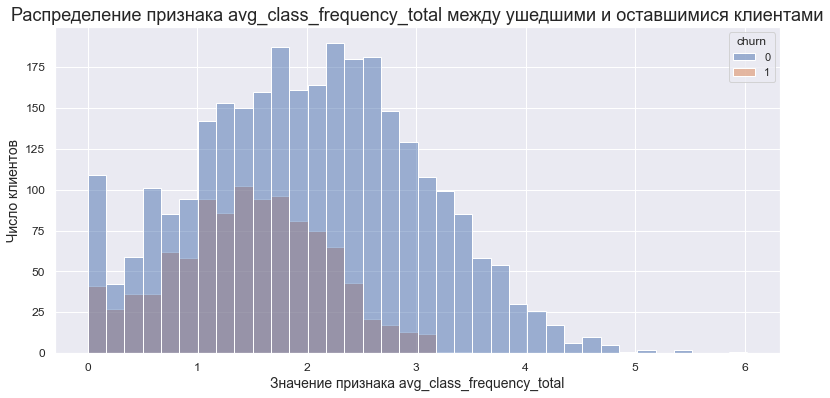

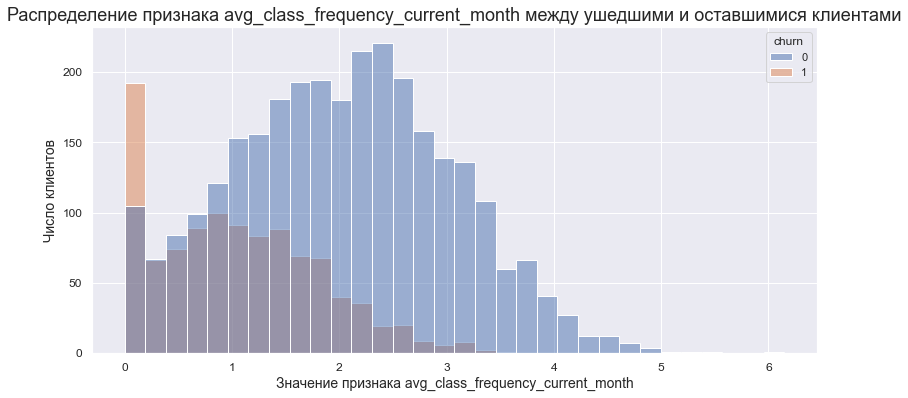

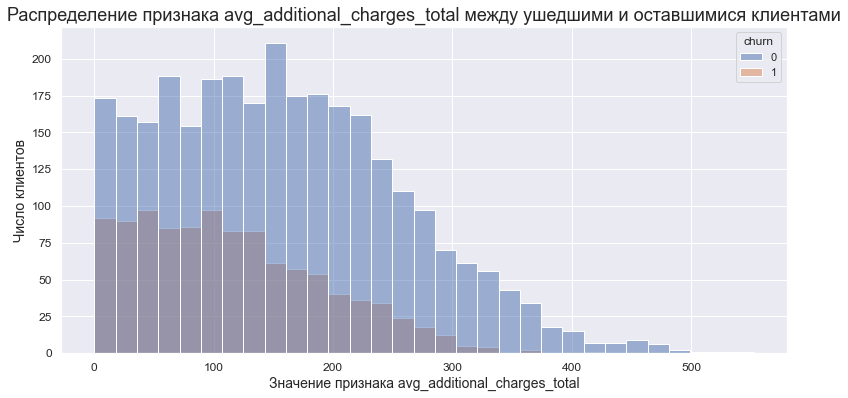

In [7]:
for column in df.columns[-4: -1]:
    plt.figure()
    sns.histplot(x=df[column], hue='churn', data=df)
    
    plt.title(f'Распределение признака {column} между ушедшими и оставшимися клиентами')
    plt.ylabel('Число клиентов')
    plt.xlabel(f'Значение признака {column}')
    plt.show()

- В целом подтвердились выводы прошлого этапа, но на графиках заметна еще одна деталь - для отточных клиентов характерно ни разу не посетить фитнес-центр в прошлом месяце. Возможно это связано с тем, что они и не были тогда в числе клиентов;
- Также на распределении мы убедились, что данные чисты от аномалий и выбросов.

### Матрица корреляций

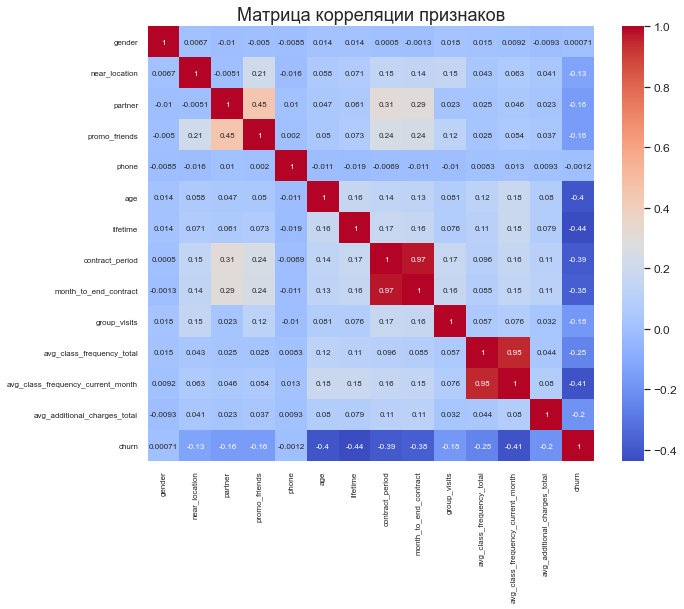

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws = {'size': 8})

plt.title('Матрица корреляции признаков')
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

- Есть 2 пары мультиколлинеарных признаков:
    - `contract_period`, `month_to_end_contract` - длительность текущего действующего абонемента ограничивает значения срока до окончания текущего действующего абонемента;
    - `avg_class_frequency_total`, `avg_class_frequency_current_month` - пользовательское поведение в разных месяцах похоже независимо от точки отчета;
- Остальные признаки либо коррелируют слабо между собой, либо вообще никак;
- У целевой переменной есть зависимости с представленным набором признаков.

### EDA. Выводы

###### Качество данных:
- Представленные данные высокого качества и не нуждаются в предобработке.
- Есть 2 группы мультиколлинеарных признака, если будет использоваться чувствительная к этому модель, то их следует обработать:
    - `contract_period`, `month_to_end_contract`;
    - `avg_class_frequency_total`, `avg_class_frequency_current_month`;

###### Пользовательский портрет:
- Живут или работают недалеко от фитнес-центра;
- Половина приходит по партнерской программе, треть - по программе "приведи друга";
- Клиенты - это в равной степени и мужчины и женщины, средний возраст 29 лет;
- Среднее время жизненного цикла меньше, чем среднее время контракта, значит доля новых клиентов высока;
- Четверть клиентов попадает в отток.

###### Клиенты оттока:
- Реже работают/живут недалеко от фитнес-центра;
- Реже приходят по партнерской программе, либо по программе "приведи друга";
- Моложе;
- Оформляют контракты на менее длительные сроки;
- Уходят в первый месяц;
- Реже посещают тренировки и реже ходят на групповые занятия;

## Модель прогнозирования оттока клиентов

- Для решения задачи классификации создадим 2 модели - логистической регрессии и случайного леса.
- По метрикам accuracy, precision и recall выберем наилучую из них и передадим бизнесу.
- Для обучения этих моделей разделим датафрейм на признаки и целевую переменную, их на тренировочную и валидационную выборки, а признаки стандартизируем.

### Подготовка и проверка моделей

###### Тестовая и валидационная выборки

In [9]:
# делим данные на фичи и целевую переменную
X = df.drop('churn', axis=1)
y = df['churn']

# разделяем их на тренировочную и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# стандартизируем фичи
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

###### Обучение моделей 

In [10]:
# модель логистической регрессии
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train_st, y_train)

# модель случайного леса
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(X_train_st, y_train)

# получим их предсказания
lr_pred = model_lr.predict(X_test_st)
rf_pred = model_rf.predict(X_test_st)

###### Сравнение моделей 

In [11]:
values = [['логистической регрессии', lr_pred], ['случайного леса', rf_pred]]

for name, y_p in values:
    print(
        f'''Метрики для модели {name}:
Accuracy: {accuracy_score(y_test, y_p)}\tPrecision: {precision_score(y_test, y_p)}\tRecall: {recall_score(y_test, y_p)}
'''
    )

Метрики для модели логистической регрессии:
Accuracy: 0.9225	Precision: 0.8541666666666666	Recall: 0.8282828282828283

Метрики для модели случайного леса:
Accuracy: 0.91375	Precision: 0.8412698412698413	Recall: 0.803030303030303



### Прогнозирование оттока. Выводы

- По всем метрикам лучше себя показываем логистическая регрессия. Это хорошо с двух точек зрения - во первых она довольна проста, а во вторых мы можем получить из нее весы параметров и оценить какой из них наиболее ценен;
- В данной ситуации трудно судить что нам важнее precision или recall, т.к. неизвестно о бизнес целях;
- В запросе бизнеса гворится о предсказании оттока, так что лучшей метрикой тут можно считать accuracy, по которой на валидационной выборке модель показала себя очень хорошо.

## Кластеризация клиентов

- Так как перед нами стоит задача кластеризации клиентов, то воспользуемся алгоритмом K-Means.
- Используем агломеративную иерархическую кластеризацию, чтобы по высоте полученных кластеров в дендаграмме определить их оптимальное число.
- Для данных алгоритмов подходят только стандандартизированные данные, но они устойчивы к мультиколлинеарности.

### Выделение кластеров

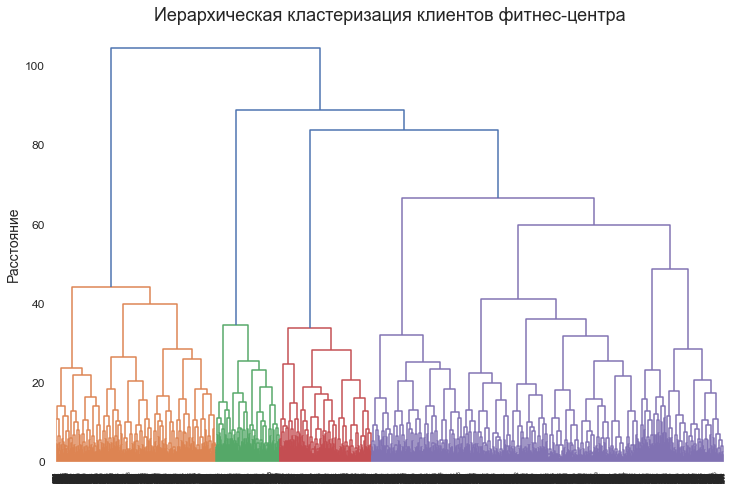

In [12]:
# стандартизируем данные
km_scaler = StandardScaler()
X_st = km_scaler.fit_transform(df.drop('churn', axis=1))

# матрица расстояний
linked = linkage(X_st, method = 'ward')

# дендрограмма для кластеров
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top')

plt.title('Иерархическая кластеризация клиентов фитнес-центра')
plt.ylabel('Расстояние')
plt.show()

Функция разделила пользователей на 4 кластера, но крайне-правый кластер можно разбить еще на 3, что даст нам 6 кластеров примерно равнозначных между собой по объему и по расстоянию между элементами.

In [13]:
# задаем модель K-Means
km = KMeans(n_clusters=6, random_state=0)

# сразу добавляем результат ее работы в датафрейм
df['cluster'] = km.fit_predict(X_st)
df.head()

,gender,near_location,partner,promo_friends,phone,age,lifetime,contract_period,month_to_end_contract,group_visits,avg_class_frequency_total,avg_class_frequency_current_month,avg_additional_charges_total,churn,cluster
0,1,1,1,1,0,29,3,6,5.0,1,0.020398,0.000000,14.227470,0,3
1,0,1,0,0,1,31,7,12,12.0,1,1.922936,1.910244,113.202938,0,0
2,0,1,1,0,1,28,2,1,1.0,0,1.859098,1.736502,129.448479,0,4
3,0,1,1,1,1,33,2,12,12.0,1,3.205633,3.357215,62.669863,0,0
4,1,1,1,1,1,26,3,1,1.0,0,1.113884,1.120078,198.362265,0,5


### Описание кластеров

Посмотрим средние значения в кластерах

In [14]:
df.groupby('cluster').mean().sort_values('churn', ascending=False).T

cluster,4,2,3,5,1,0
gender,0.485437,0.495968,0.523438,0.487002,0.583333,0.500595
near_location,1.000000,0.000000,0.861979,1.000000,0.962798,0.946492
partner,0.237864,0.469758,0.471354,0.812825,0.282738,0.747919
promo_friends,0.014563,0.080645,0.307292,1.000000,0.099702,0.495838
phone,1.000000,1.000000,0.000000,1.000000,0.997024,1.000000
age,28.211650,28.445565,29.286458,29.041594,30.321429,29.953627
lifetime,2.454369,2.758065,3.906250,3.686308,5.074405,4.715815
contract_period,1.997087,2.288306,4.768229,3.065858,2.882440,11.885850
month_to_end_contract,1.912621,2.143145,4.466146,2.864818,2.633929,10.844233
group_visits,0.326214,0.217742,0.424479,0.445407,0.477679,0.551724


Кластеры можно разделить на 3 группы по степени оттока в них, опишим их по категориальным признакам:
- **отточные** - 4 и 2. Половина клиентов этих кластеров попала в отток:
    - 4 кластер:
        - редко приходят по партнерской программе;
        - *главное отличие:* практически никогда не приходят по программе "приведи друга";
        - реже остальных групп участвуют в групповых занятиях;
    - 2 кластер:
        - *главное отличие:* живут/работают в далеке от фитнес-центра;
        - редко приходят по программе "приведи друга";
        - вдвое реже остальных групп участвуют в групповых занятиях;
        
        
- **обычные** - 3 и 5. Четверть клиентов в оттоке, что соответствует среднему значению по всем данным:
    - 3 кластер:
        - *главное отличие:* не оставляют телефонный номер;
    - 5 кластер:
        - не примечательны по какому-либо признаку;
        
        
- **стабильные** - 1 и 0 - это 5 и 2 процентов оттока соответственно, что крайне низкие значения:
    - 1 кластер:
        - *главное отличие:* в основном мужской кластер;
        - редко приходят по программе "приведи друга";
    - 0 кластер:
        - часто приходят по партнерской программе;
        - часто приходят по программе "приведи друга";
        - часто участвуют в групповых занятиях";
        - *главное отличие:* можно назвать социальным классом.

По средним значениям мы ознакомились с бинарными признаками, теперь для остальных построим графики.

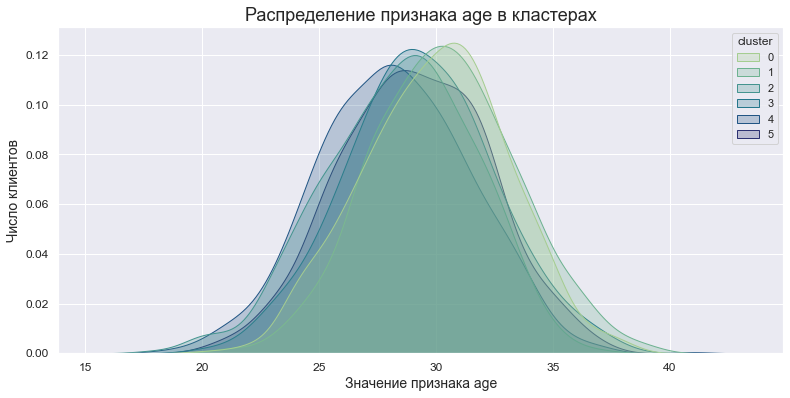

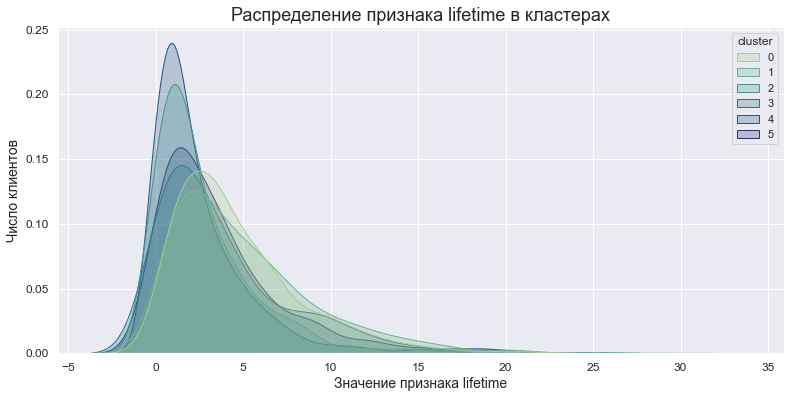

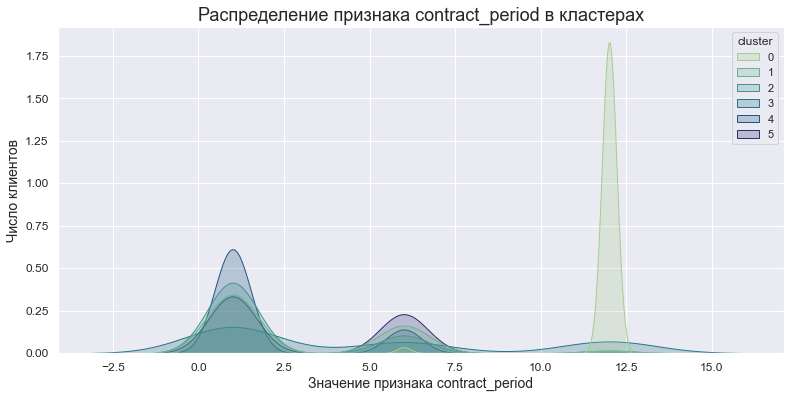

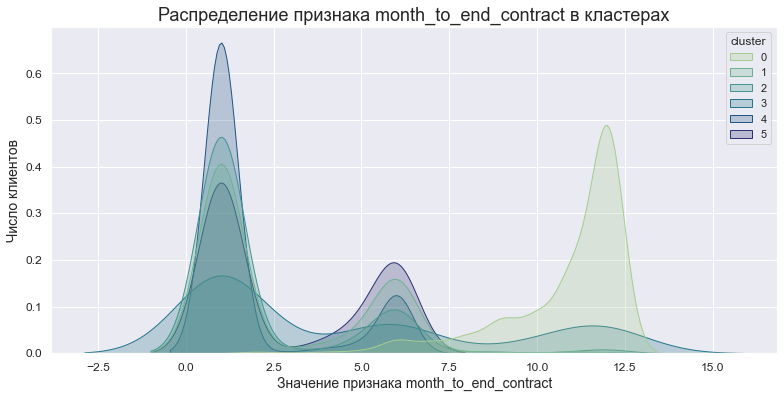

In [15]:
for column in df.columns[5:-6]:
    plt.figure()
    sns.kdeplot(x=df[column], hue='cluster', data=df, fill=True, common_norm=False, palette="crest")
    
    plt.title(f'Распределение признака {column} в кластерах')
    plt.ylabel('Число клиентов')
    plt.xlabel(f'Значение признака {column}')
    plt.show()

Заметно отличие отточных кластеров: их лайфтайм меньше, они берут абонементы на меньшие сроки и их абонементы подходят к концу. У нулевого, наименее отточного, кластера наблюдается обратная картина.

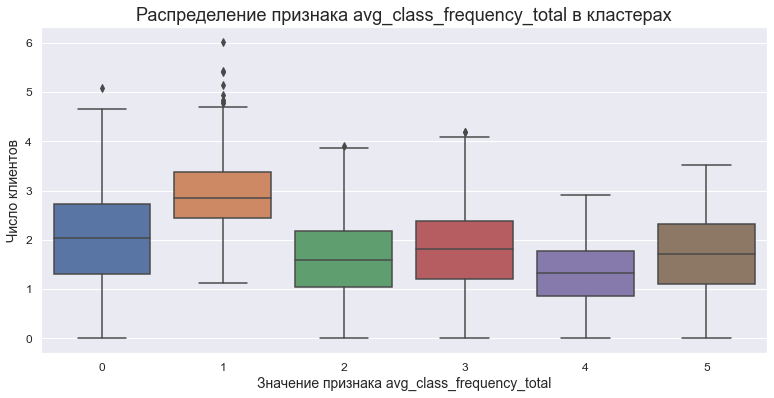

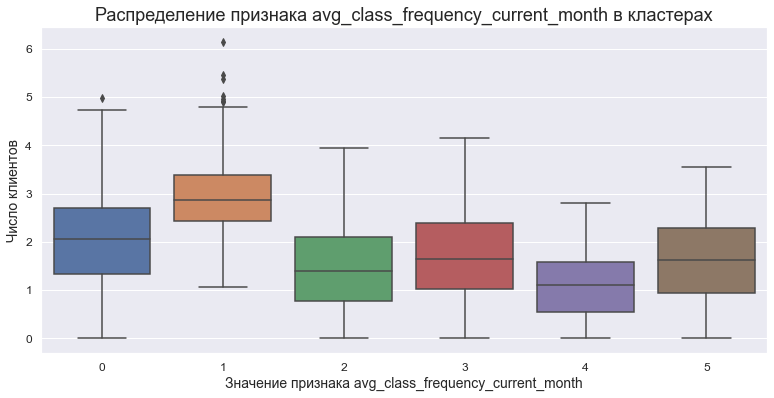

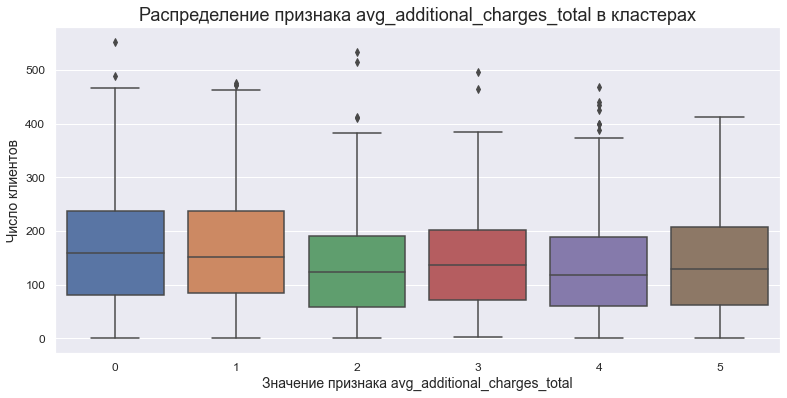

In [16]:
for column in df.columns[-5: -2]:
    plt.figure()
    sns.boxplot(x='cluster', y=df[column], data=df)
    
    plt.title(f'Распределение признака {column} в кластерах')
    plt.ylabel('Число клиентов')
    plt.xlabel(f'Значение признака {column}')
    plt.show()

- 1-й кластер посещает зал чаще всех, а вот 4-й реже;
- стабильные кластеры тратят больше всех денег на побочные услуги;
- стабильные классы приобретают абонементы на более долгие сроки, отточные наоборот, на 1 месяц.

### Кластеризация. Выводы

Кластеры можно разделить на 3 группы по степени оттока в них, опишим их по категориальным признакам:
- **отточные** - 4 и 2. Половина клиентов этих кластеров попала в отток:
    - 4-й кластер (пассивный/незаинтересованный):
        - *главное отличие:* практически никогда не приходят по программе "приведи друга";
        - редко приходят по партнерской программе;
        - реже остальных групп участвуют в групповых занятиях;
        - реже всех посещает тренировки;
        - покупают абонементы на 1 месяц;
    - 2-й кластер (удаленный):
        - *главное отличие:* живут/работают в далеке от фитнес-центра;
        - редко приходят по программе "приведи друга";
        - вдвое реже остальных групп участвуют в групповых занятиях;
        
        
- **обычные** - 3 и 5. Четверть клиентов в оттоке, что соответствует среднему значению по всем данным:
    - 3-й кластер (недоверчивый):
        - *главное отличие:* не оставляют телефонный номер;
    - 5-й кластер (центральный):
        - непримечательны по какому-либо признаку;
        
        
- **стабильные** - 1 и 0 - это 5 и 2 процентов оттока соответственно, что крайне низкие значения:
    - 1-й кластер (спортивный):
        - *главное отличие:* значительно чаще посещает тренировки;
        - в основном мужской кластер;
        - редко приходят по программе "приведи друга";
        - тратят больше денег на побочные услуги;
    - 0-й кластер (социальный):
        - часто приходят по партнерской программе;
        - часто приходят по программе "приведи друга";
        - часто участвуют в групповых занятиях";
        - тратят больше денег на побочные услуги;
        - *главное отличие:* можно назвать социальным классом.

## Вывод исследования и базовые  рекомендации по работе с клиентами

###### Выводы

1. Создана модель прогнозирования оттока клиентов:<p></p><p></p>
    - Точность прогноза на валидационных данных: 92,25%;
    - База модели - логистическая регрессия. Это довольно удобная модель, которая может дать информацию о ценности каждого признака клиента.<p></p><p></p>
2. Выделены клиентские кластеры:<p></p><p></p>
    - **отточные** - 4 и 2. Половина клиентов этих кластеров попала в отток:
        - 4-й кластер (незаинтересованный):
            - *главное отличие:* практически никогда не приходят по программе "приведи друга";
            - покупают абонементы на 1 месяц;
            - редко приходят по партнерской программе;
            - реже остальных групп участвуют в групповых занятиях;
            - реже всех посещает тренировки;
        - 2-й кластер (удаленный):
            - *главное отличие:* живут/работают в далеке от фитнес-центра;
            - редко приходят по программе "приведи друга";
            - вдвое реже остальных групп участвуют в групповых занятиях;<p></p><p></p>
    - **обычные** - 3 и 5. Четверть клиентов в оттоке, что соответствует среднему значению по всем данным:
        - 3-й кластер (недоверчивый):
            - *главное отличие:* не оставляют телефонный номер;
        - 5-й кластер (центральный):
            - непримечательны по какому-либо признаку;<p></p><p></p>
    - **стабильные** - 1 и 0 - это 5 и 2 процентов оттока соответственно, что крайне низкие значения:
        - 1-й кластер (спортивный):
            - *главное отличие:* значительно чаще посещает тренировки;
            - в основном мужской кластер;
            - редко приходят по программе "приведи друга";
            - тратят больше денег на побочные услуги;
        - 0-й кластер (социальный):
            - часто приходят по партнерской программе;
            - часто приходят по программе "приведи друга";
            - часто участвуют в групповых занятиях";
            - тратят больше денег на побочные услуги;
            - *главное отличие:* можно назвать социальным классом.

###### Рекомендации

1. Социальный кластер показывает низкую долю оттока. Они часто приходят по партнерской или дружеской программа, а значит ходят на тренировки вместе с кем-либо. Также они чаще ходят на групповые занятия, а значит могут заводить знакомства уже в фитнес-центре. С другой стороны наиболее отточные кластеры, которые характеризуются низкой социальной активностью.
    - **Рекомендация:** стимулировать социальную активность на пощадке, например проводить тематические собрания.<p></p><p></p>
2. Второй стабильный кластер - спортивный. Клиенты этого класса чаще всех посещают фитнес-центр, можно предположить, что они носители развитой спортивной культуры и спорт значительная часть их жизни.
    - **Рекомендация:** способствовать развитию спортивной культуры в рамках площадки, проводить бесплатные мастер-классы, раздавать буклеты по здоровому образу жизни всем клиентам.<p></p><p></p>
3. Клиенты незаинтересованного класса покупают абонементы на 1 месяц и редко посещают тренировки, но в то же свободно делятся с фитнес-центром своим номером телефона.
    - **Рекомендация:** периодические напоминания о возможности занятия для клиентов этого класса, маркетинговые предложения длительных абониментов со значительной скидкой. Провести глубокое исследование данного кластера на возможности дополнительного удержания.<p></p><p></p>
4. Главное отличие клиентов из удаленного кластера - они работают/живут далеко от фитнес-центра.
    - **Рекомендация:** такую проблему можно решить только открытием новых площадок по городу, иначе такие клиенты все равно попадут в отток.